# Details of the dataset:
The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA
Date/Time : The date and time of the Uber pickup
Lat : The latitude of the Uber pickup
Lon : The longitude of the Uber pickup
Base : The TLC base company code affiliated with the Uber pickup

The Base codes are for the following Uber bases:
B02512 : Unter
B02598 : Hinter
B02617 : Weiter
B02682 : Schmecken
B02764 : Danach-NY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
files_2014 = ["uber-raw-data-apr14.csv", "uber-raw-data-may14.csv", "uber-raw-data-jun14.csv", "uber-raw-data-jul14.csv", "uber-raw-data-aug14.csv", "uber-raw-data-sep14.csv"]
df14 = pd.concat([pd.read_csv(file, encoding='utf-8') for file in files_2014])


In [3]:
df14

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [4]:
df14.shape

(4534327, 4)

In [5]:
df14.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
df14['Date/Time'] = pd.to_datetime(df14['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [7]:
df14.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [8]:
df14['month'] = df14['Date/Time'].dt.month
df14['weekday'] = df14['Date/Time'].dt.day_name()
df14['day'] = df14['Date/Time'].dt.day
df14['hour'] = df14['Date/Time'].dt.hour
df14['minute'] = df14['Date/Time'].dt.minute

In [9]:
df14

,Date/Time,Lat,Lon,Base,month,weekday,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,Tuesday,1,0,33
...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,Tuesday,30,22,57
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,Tuesday,30,22,57
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,Tuesday,30,22,58
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,Tuesday,30,22,58


In [10]:
df14.describe()

,Lat,Lon,month,day,hour,minute
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,6.828703e+00,1.594337e+01,1.421831e+01,2.940071e+01
std,3.994991e-02,5.726670e-02,1.703810e+00,8.744902e+00,5.958759e+00,1.732238e+01
min,3.965690e+01,-7.492900e+01,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.072110e+01,-7.399650e+01,5.000000e+00,9.000000e+00,1.000000e+01,1.400000e+01
50%,4.074220e+01,-7.398340e+01,7.000000e+00,1.600000e+01,1.500000e+01,2.900000e+01
75%,4.076100e+01,-7.396530e+01,8.000000e+00,2.300000e+01,1.900000e+01,4.400000e+01
max,4.211660e+01,-7.206660e+01,9.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


In [11]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   month      int64         
 5   weekday    object        
 6   day        int64         
 7   hour       int64         
 8   minute     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 345.9+ MB


In [12]:
df14.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
month        0
weekday      0
day          0
hour         0
minute       0
dtype: int64

In [13]:
df14.duplicated().sum()

82581

In [14]:
df14.drop_duplicates(inplace=True)

# Analysis Trips of Uber 

### Analysis of trips by week days

<AxesSubplot:xlabel='weekday', ylabel='count'>

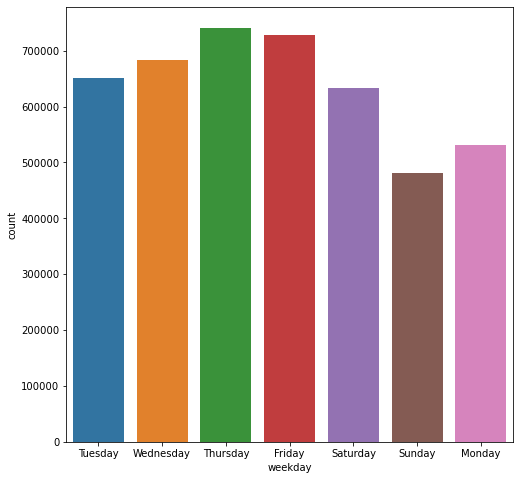

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(data=df14,x='weekday')

#### From this countplot we can observe that Thursdays and Fridays have the maximum trips

### Analysis of trips by hours

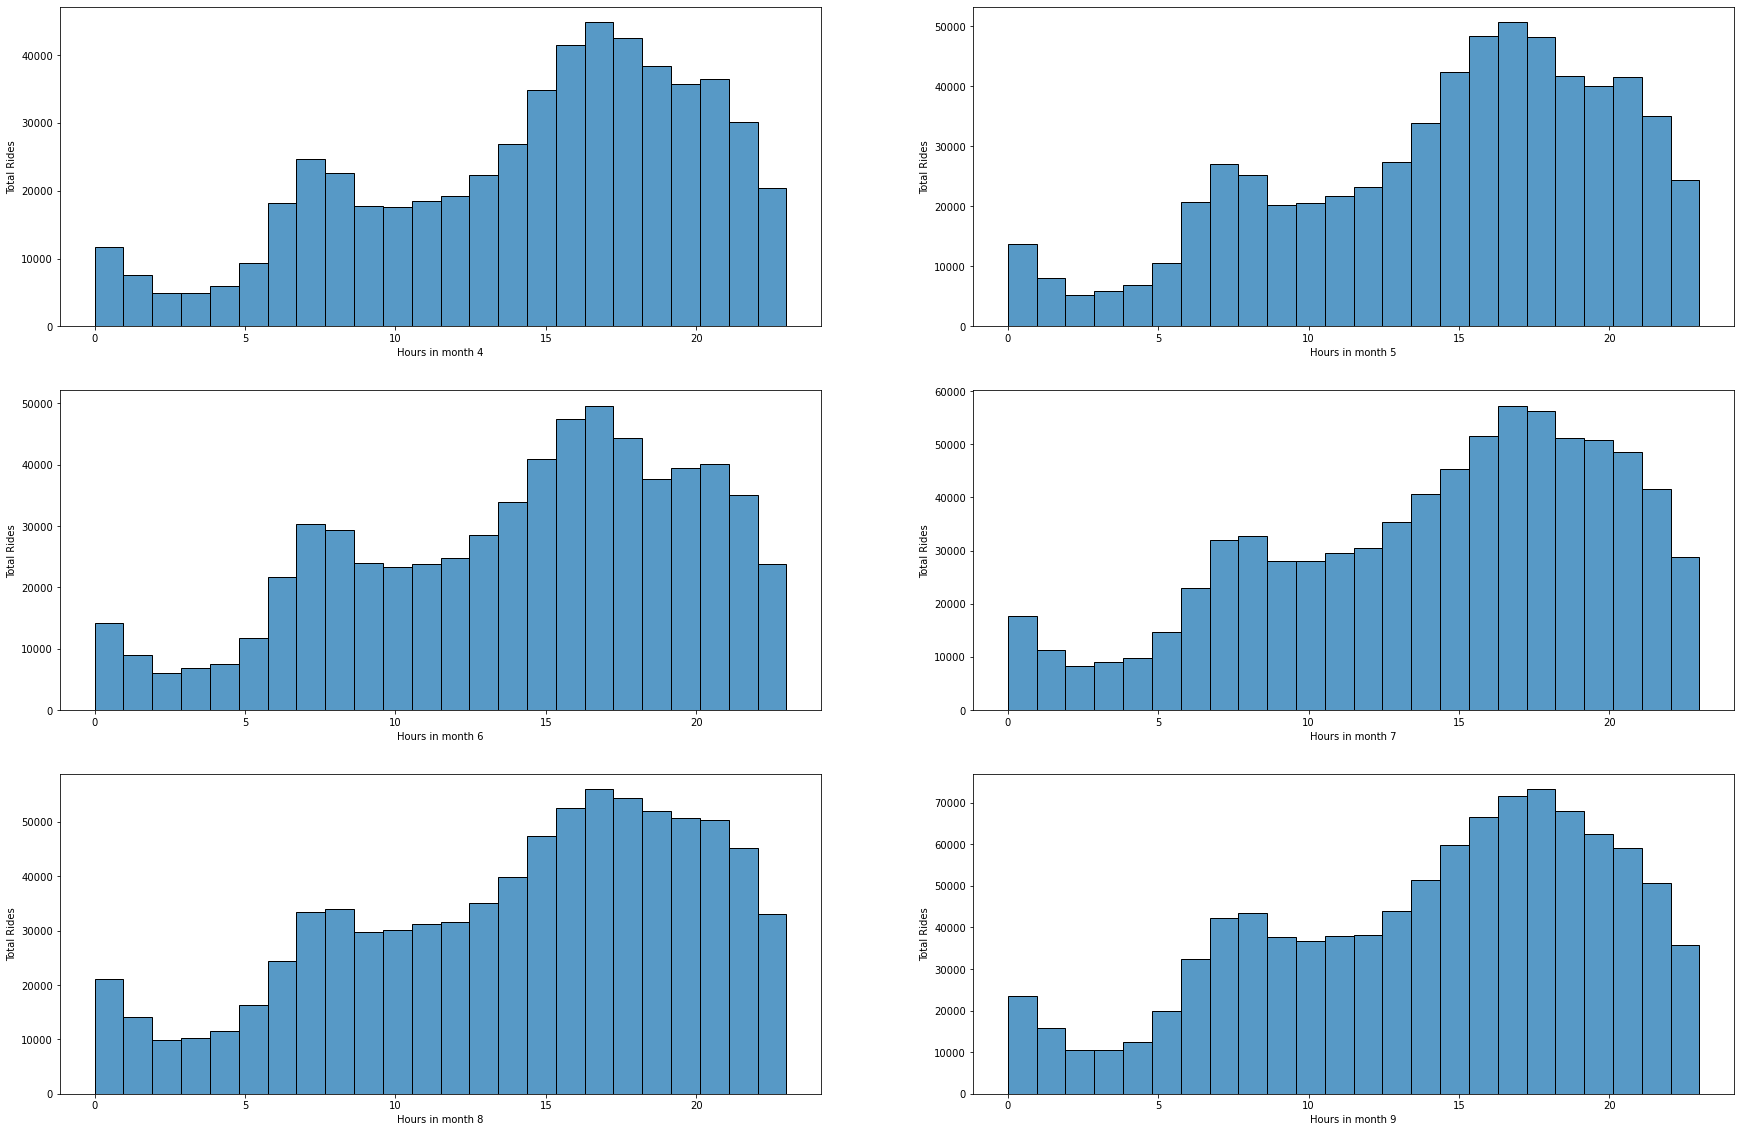

In [16]:
plt.figure(figsize=(30,20))
for i,month in enumerate(df14['month'].unique()):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df14,x=df14[df14['month'] == month]['hour'],bins=24)
    plt.xlabel('Hours in month {}'.format(month))
    plt.ylabel('Total Rides')

#### From these histplots we can observe that the 16th,17th & 18th Hour have the max trips everyday in each month

### Analysis of which month has maximum rides

In [17]:
df14.groupby('month')['hour'].count()

month
4     556767
5     642360
6     653158
7     781969
8     813393
9    1004099
Name: hour, dtype: int64

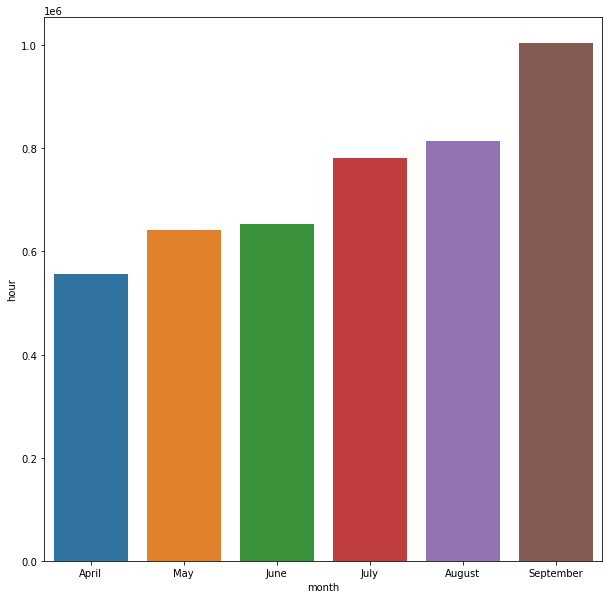

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(data=df14,x=df14.groupby('month')['hour'].count().index,y=df14.groupby('month')['hour'].count())
plt.xticks(ticks=[0,1,2,3,4,5],labels=['April','May','June','July','August','September'])
plt.show()

####  Fron this plot we can observe that September month has the maximum rides

### Analysis of trip of each day

In [19]:
df14.groupby('day')['hour'].count()

day
1     125282
2     140767
3     140688
4     138361
5     144547
6     137313
7     140983
8     143530
9     152500
10    149715
11    146135
12    157725
13    153991
14    137656
15    150892
16    156020
17    149828
18    148509
19    150226
20    141363
21    138593
22    144160
23    152976
24    141528
25    149783
26    150403
27    142815
28    138413
29    146267
30    164040
31     76737
Name: hour, dtype: int64

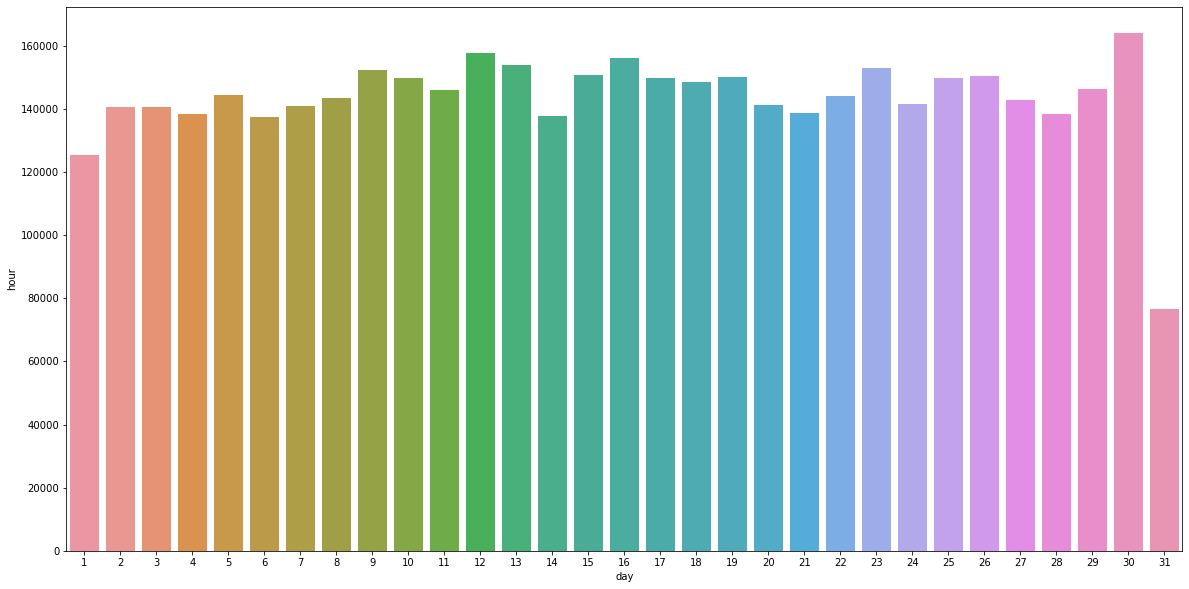

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(data=df14,x=df14.groupby('day')['hour'].count().index,y=df14.groupby('day')['hour'].count())
plt.show()

#### 30th has the max rides and 31st of the month has the least rides

### Analysis of total rides month 

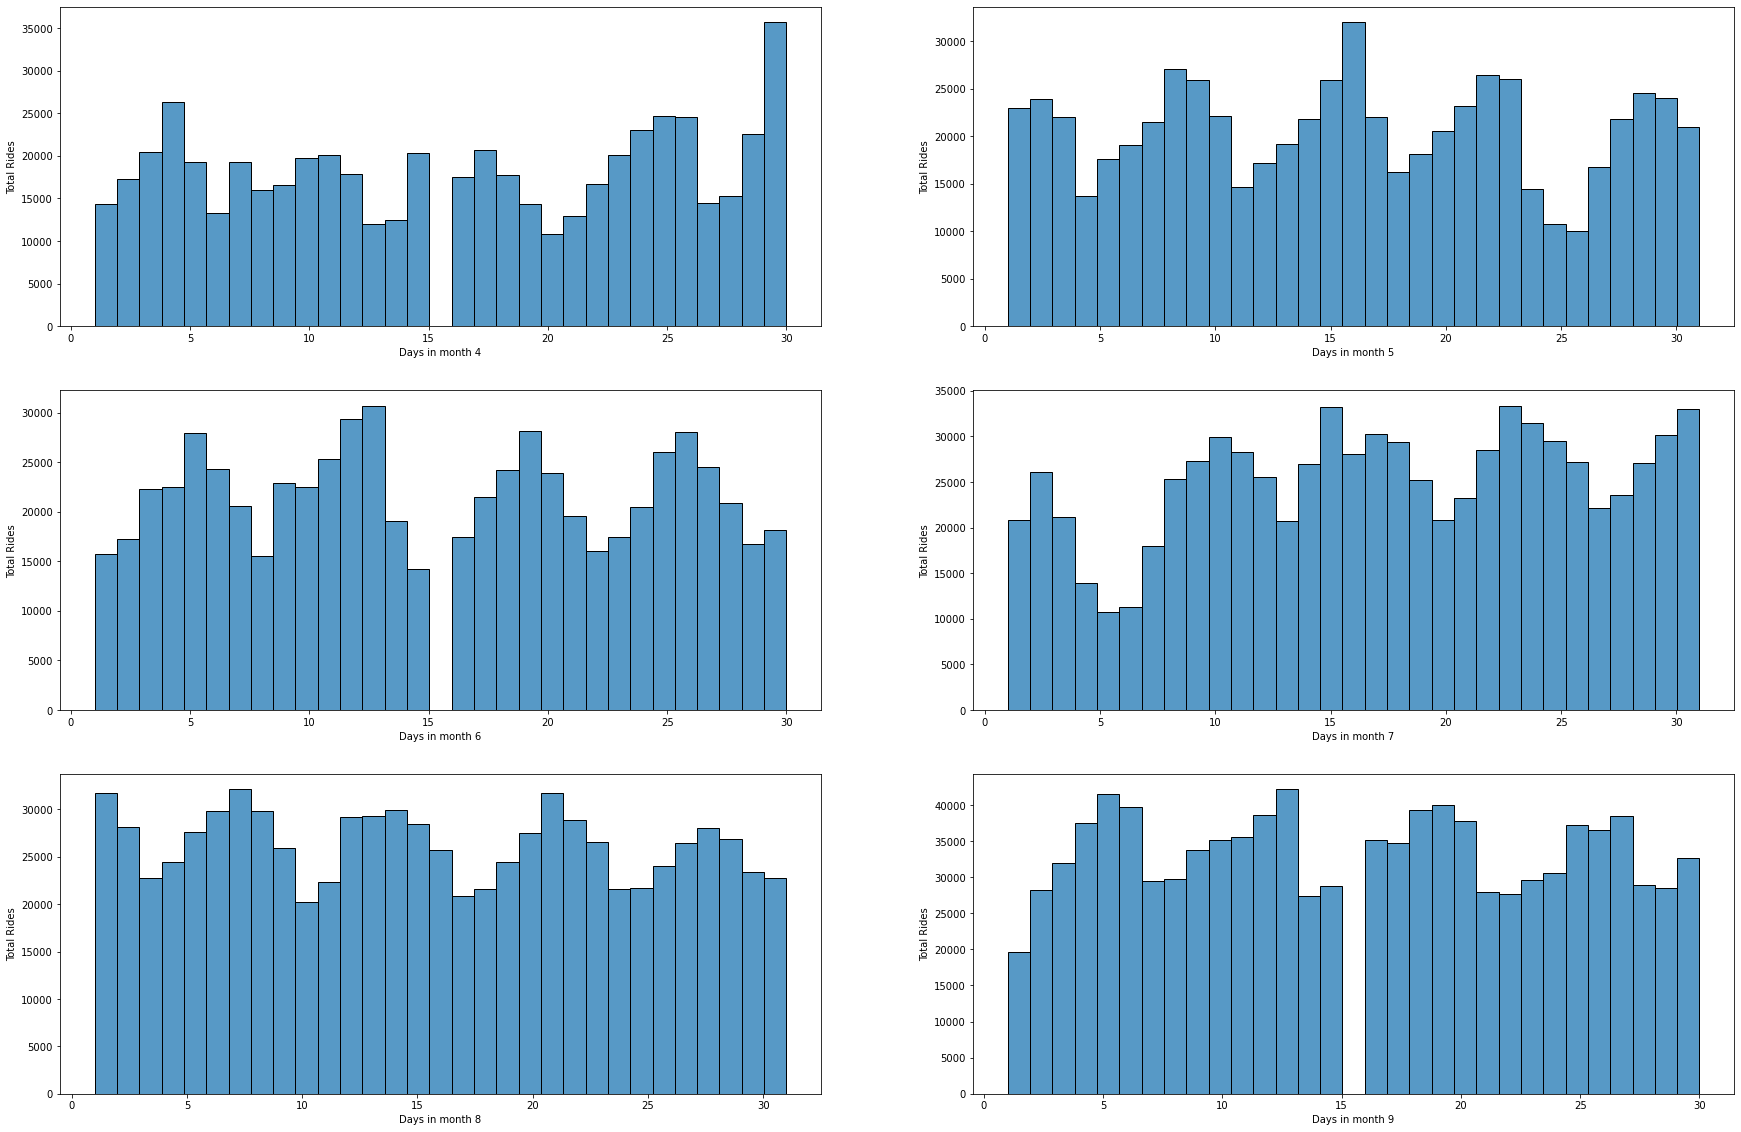

In [21]:
plt.figure(figsize=(30,20))
for i,month in enumerate(df14['month'].unique()):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df14,x=df14[df14['month'] == month]['day'],bins=31)
    plt.xlabel('Days in month {}'.format(month))
    plt.ylabel('Total Rides')

#### Sept month has max rides everyday

### Analysing rush in hour

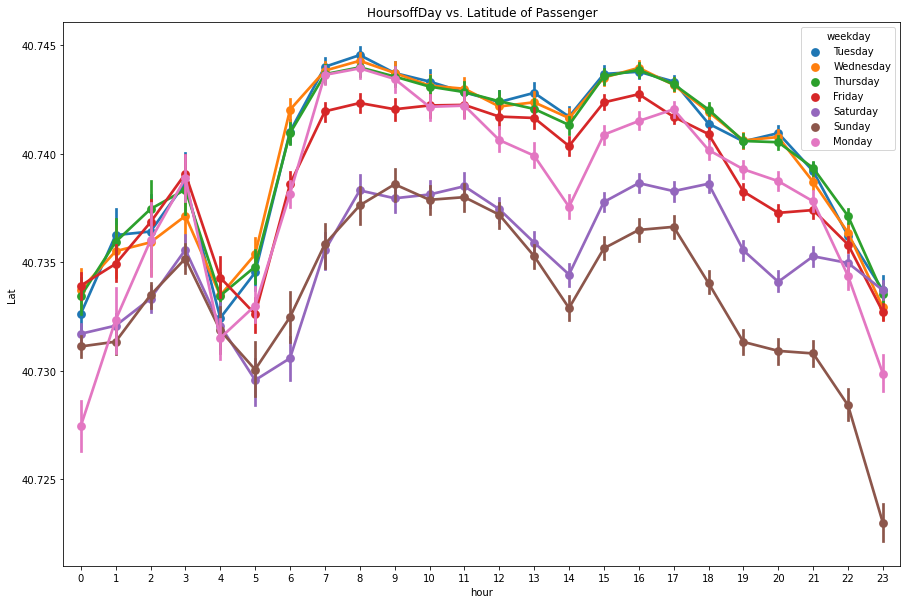

In [22]:
plt.figure(figsize=(15,10))
sns.pointplot(data=df14,x='hour',y='Lat',hue='weekday')
plt.title('HoursoffDay vs. Latitude of Passenger')
plt.show()

#### Tuesday, Wednesday and Thursday have the max rush

### Analyse which base number gets popular by month name

In [23]:
df14.head()

,Date/Time,Lat,Lon,Base,month,weekday,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,Tuesday,1,0,33


In [24]:
base = df14.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,34258
1,B02512,5,35441
2,B02512,6,31674
3,B02512,7,34381
4,B02512,8,30975
5,B02512,9,33624
6,B02598,4,181891
7,B02598,5,257853
8,B02598,6,240538
9,B02598,7,243204


<AxesSubplot:xlabel='month', ylabel='Date/Time'>

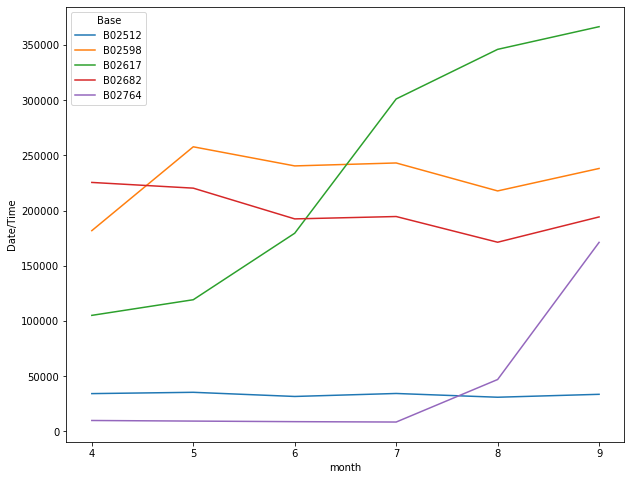

In [25]:
plt.figure(figsize=(10,8))
sns.lineplot(data=base,x='month',y='Date/Time',hue='Base')

#### Base number B02617 is popular in 7,8 and 9th month.
#### And B02512 is stable each month.
#### Base B02764 is low till 7th month and increases after that.

### Analysis of location data points

In [26]:
df14.head()

,Date/Time,Lat,Lon,Base,month,weekday,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,Tuesday,1,0,33


(40.0, 41.2)

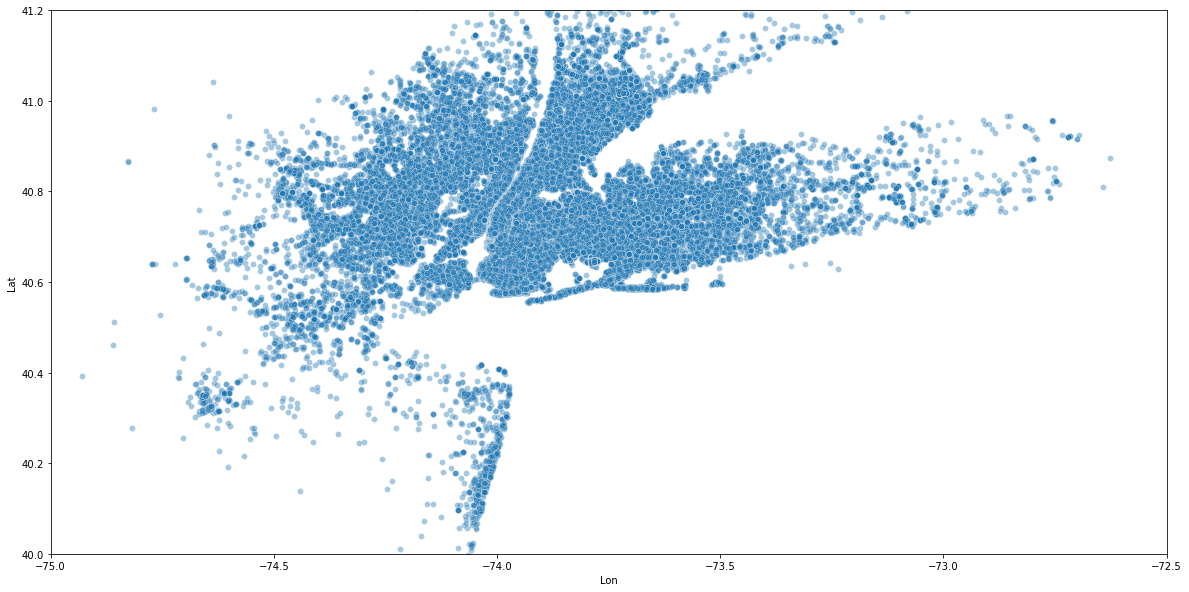

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df14,y='Lat',x='Lon',alpha=0.4)
plt.xlim(-75,-72.5)
plt.ylim(40.0,41.2)

#### From this scatter plot we get a view of the location of the data points with the given latitude and longitude

### Analysing which base number has most active vehicles in January and February 2015

In [28]:
df_foil = pd.read_csv('Uber-Jan-Feb-FOIL.csv')
df_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [29]:
df_foil.dtypes

dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object

In [30]:
df_foil['date'] = pd.to_datetime(df_foil['date'],format='%m/%d/%Y')

In [31]:
df_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

<AxesSubplot:xlabel='dispatching_base_number', ylabel='active_vehicles'>

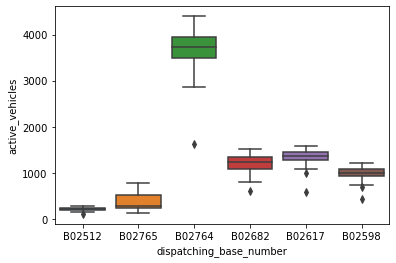

In [32]:
sns.boxplot(data=df_foil,x='dispatching_base_number',y='active_vehicles')

#### Base number B02764 has the max active vehicle in jan-feb 2015

### Analysing which base number has most trips in January and February 2015

<AxesSubplot:xlabel='dispatching_base_number', ylabel='trips'>

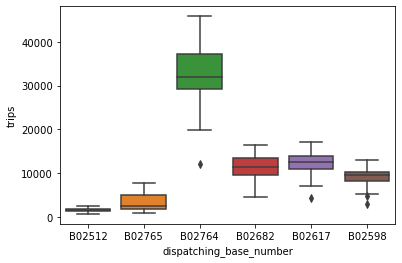

In [33]:
sns.boxplot(data=df_foil,x='dispatching_base_number',y='trips')

#### Base B02764 has most trips than other bases

### How average trips/vehicles increase/decrease with dates with each of base number in January and February 2015

In [34]:
df_foil['trips/vehicles'] = df_foil['trips'] / df_foil['active_vehicles']
df_foil

,dispatching_base_number,date,active_vehicles,trips,trips/vehicles
0,B02512,2015-01-01,190,1132,5.957895
1,B02765,2015-01-01,225,1765,7.844444
2,B02764,2015-01-01,3427,29421,8.585060
3,B02682,2015-01-01,945,7679,8.125926
4,B02617,2015-01-01,1228,9537,7.766287
...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,10.073887
350,B02617,2015-02-28,1372,14022,10.220117
351,B02682,2015-02-28,1386,14472,10.441558
352,B02512,2015-02-28,230,1803,7.839130


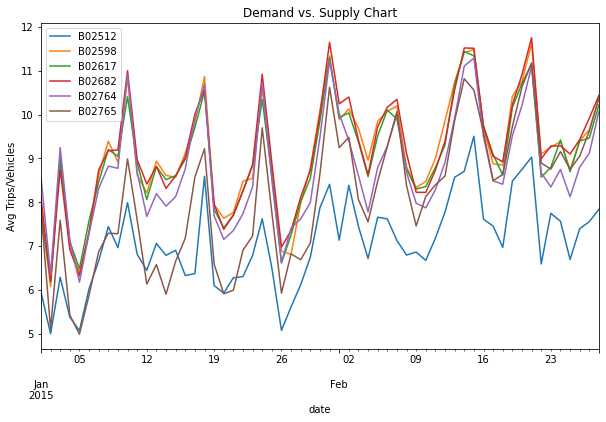

In [35]:
plt.figure(figsize=(10,6))
df_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicles'].plot()
plt.title('Demand vs. Supply Chart')
plt.ylabel('Avg Trips/Vehicles')
plt.legend()
plt.show()

#### We can observe the relationship for each base no over time

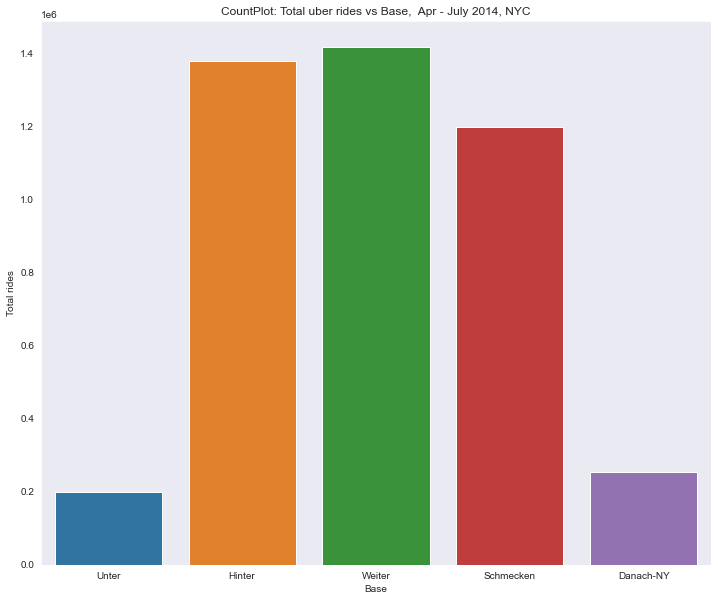

In [50]:
#A mapper to map base number with its name
BaseMapper={'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken','B02764' : 'Danach-NY'}

#Count plot of Base
plt.figure(figsize=(12,10))
sns.set_style("dark")
_=sns.countplot(x=df14['Base'].map(BaseMapper))
plt.ylabel('Total rides')
_=plt.title('CountPlot: Total uber rides vs Base,  Apr - July 2014, NYC')